# Project: Investigate a Dataset - "No-show appointments"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

This dataset 'No-Show Appointments' shows information about 100k of medical appointments in Brazil where it is focused on the question of whether or not patients show up for their appointment. Also it shows some other aspects and diseases for each patient. Here's the columns and short description:

| Column           | Description                                       |
|------------------|---------------------------------------------------|
| PatientID        | Unique identifier for each patient.               |
| AppointmentID    | Unique identifier for each appointment.           |
| Gender           | Patient's gender.                                 |
| ScheduledDay     | The date and time when the appointment was scheduled. |
| AppointmentDay   | The date and time when the appointment is set to occur. |
| Age              | The age of the patient.                           |
| Neighbourhood    | The neighborhood where the patient lives.         |
| Scholarship      | Indicates if the patient is on a scholarship program (e.g., Bolsa Família). |
| Hypertension     | Indicates if the patient has hypertension.        |
| Diabetes         | Indicates if the patient has diabetes.            |
| Alcoholism       | Indicates if the patient has a history of alcoholism. |
| Handicap         | Indicates if the patient has any disability.      |
| SMS_received     | Indicates if the patient received an SMS reminder for the appointment. |
| No-show          | Indicates if the patient did not show up for the appointment. |


So we will go through the dataset by exploring, wrangling, cleaning, showing some visualizations, answering some questions, and at the end we will come up with some conclusions.


### Question(s) for Analysis

1. Do Nighbourhood and Age affect the attendance?
2. How does the age affect the attendace?
3. Which Neighbourhood has the highest attendance percentage?
4. How many patiants attended the appointment?



In [1]:
# Import packages and setting things up

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:.0f}'.format)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [3]:
# Print out a few lines.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df['PatientId'].nunique()

62299

The dataset has 62299 unique patients

In [5]:
# check for duplicates in the data
df.duplicated().any()

False

No duplicated rows!

In [6]:
# to print the general info about the dataframe
def dframe_info(dframe):
    print(f'Number of (rows, columns): {dframe.shape}')
    print('-------------------------------------------------')
    print('Info:')
    dframe.info()
    print('-------------------------------------------------')
    print('Describe:')
    print(dframe.describe())

In [7]:
# Data info and types
dframe_info(df)

Number of (rows, columns): (110527, 14)
-------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.



*   We have 110527 rows and 14 columns
*   No null values
*   Some values are incorrect like the min age is -1 and we will fix them later.



In [8]:
patients_with_positive_age = df[df['Age'] < 0]
print(f'There are {patients_with_positive_age.shape[0]} patients with negative age.')
patients_with_positive_age.head()

There are 1 patients with negative age.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
# Check if there are any duplications across the PatientId and the AppointmentDay

duplicates = df.duplicated(['PatientId', 'AppointmentDay'])

duplicate_rows = df[duplicates]

all_duplicate_instances = df[df.duplicated(['PatientId', 'AppointmentDay'], keep=False)]

print(f'{duplicate_rows.shape[0]} rows have duplicates of total: {all_duplicate_instances.shape[0]} based on (PatientId, AppointmentDay)')

8719 rows have duplicates of total: 16200 based on (PatientId, AppointmentDay)


In [10]:
# Check if the same PatientId with the same AppointmentDay have different No-show values.

# Group by PatientId and AppointmentDay to find discrepancies in No-show
attendance_discrepancies = df.groupby(['PatientId', 'AppointmentDay'])['No-show'].nunique()

# Filter the groups where there is more than one unique attendance status
patients_with_discrepancies = attendance_discrepancies[attendance_discrepancies > 1].index

# Display rows with attendance discrepancies
rows_with_discrepancies = df.set_index(['PatientId', 'AppointmentDay']).loc[patients_with_discrepancies].reset_index()

print(f'{rows_with_discrepancies.shape[0]} rows have discrepancies based on (PatientId, AppointmentDay, and No-show)')
rows_with_discrepancies.head()

2963 rows have discrepancies based on (PatientId, AppointmentDay, and No-show)


,PatientId,AppointmentDay,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,757145535,2016-05-19T00:00:00Z,5674161,F,2016-05-09T10:31:09Z,49,SANTA TEREZA,0,0,0,0,0,0,Yes
1,757145535,2016-05-19T00:00:00Z,5716737,F,2016-05-19T07:09:23Z,49,SANTA TEREZA,0,0,0,0,0,0,No
2,1257286674,2016-05-10T00:00:00Z,5677702,F,2016-05-10T07:32:32Z,28,SÃO BENEDITO,0,0,0,0,0,0,No
3,1257286674,2016-05-10T00:00:00Z,5624035,F,2016-04-26T15:06:27Z,28,SÃO BENEDITO,0,0,0,0,0,1,No
4,1257286674,2016-05-10T00:00:00Z,5678588,F,2016-05-10T08:44:28Z,28,SÃO BENEDITO,0,0,0,0,0,0,Yes


In [11]:
# Check if there's any appointment scheduled in the past

df_copy = df.copy()

df_copy['ScheduledDay'] = pd.to_datetime(df_copy['ScheduledDay'])
df_copy['AppointmentDay'] = pd.to_datetime(df_copy['AppointmentDay'])

df_copy['DayDifference'] = (df_copy['ScheduledDay'] - df_copy['AppointmentDay']).dt.days

condition = (df_copy['DayDifference'] > 0)

rows_with_columnA_after_columnB = df_copy[condition]
print(rows_with_columnA_after_columnB.shape)
rows_with_columnA_after_columnB.head()

(5, 15)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DayDifference
27033,7839272661752,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,1
55226,7896293967868,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,1
64175,24252258389979,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,1
71533,998231581612122,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,6
72362,3787481966821,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,1



### Data Cleaning

In [12]:
# Making a copy of the df

clean_df = df.copy()

In [13]:
dframe_info(clean_df)

Number of (rows, columns): (110527, 14)
-------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.

In [14]:
# Correcting types
clean_df['PatientId'] = clean_df['PatientId'].astype('int64')
clean_df['ScheduledDay'] = pd.to_datetime(clean_df['ScheduledDay'])
clean_df['AppointmentDay'] = pd.to_datetime(clean_df['AppointmentDay'])
clean_df['Age'] = clean_df['Age'].astype('int8')
clean_df['Hipertension'] = clean_df['Hipertension'].astype('int8')
clean_df['Diabetes'] = clean_df['Diabetes'].astype('int8')
clean_df['Alcoholism'] = clean_df['Alcoholism'].astype('int8')
clean_df['Handcap'] = clean_df['Handcap'].astype('int8')
clean_df['SMS_received'] = clean_df['SMS_received'].astype('int8')

clean_df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})
clean_df['No-show'] = clean_df['No-show'].astype('int8')


In [15]:
dframe_info(df)

Number of (rows, columns): (110527, 14)
-------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.

In [16]:
# Remove the row with ages < 0

clean_df = clean_df[clean_df['Age'] >= 0]

dframe_info(clean_df)

Number of (rows, columns): (110526, 14)
-------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  int64              
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int8               
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int8               
 9   Diabetes        110526 non-null  int8               
 10  Alcoholism      110526 non-null  int8               
 11  Handcap         110526 non-null  i

In [17]:
# Remove any row with ScheduledDay > AppointmentDay of days

clean_df['DayDifference'] = (clean_df['ScheduledDay'] - clean_df['AppointmentDay']).dt.days

condition = (clean_df['DayDifference'] <= 0)

clean_df = clean_df[condition]

# drop DayDifference column
clean_df.drop(['DayDifference'], axis=1, inplace=True)

dframe_info(clean_df)

Number of (rows, columns): (110521, 14)
-------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110521 non-null  int64              
 1   AppointmentID   110521 non-null  int64              
 2   Gender          110521 non-null  object             
 3   ScheduledDay    110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110521 non-null  datetime64[ns, UTC]
 5   Age             110521 non-null  int8               
 6   Neighbourhood   110521 non-null  object             
 7   Scholarship     110521 non-null  int64              
 8   Hipertension    110521 non-null  int8               
 9   Diabetes        110521 non-null  int8               
 10  Alcoholism      110521 non-null  int8               
 11  Handcap         110521 non-null  i

In [18]:
def no_of_duplicates(dframe, columns):
  duplicated_rows = dframe[dframe[columns].duplicated(keep=False)]
  print(f'Total number of duplications: {duplicated_rows.shape}')

In [19]:
# find the columns have the same values of PatientId, AppointmentDay and No-show

no_of_duplicates(clean_df, ["PatientId", "AppointmentDay", "No-show"])

clean_df = clean_df.drop_duplicates(subset=["PatientId", "AppointmentDay", "No-show"], keep='first')

no_of_duplicates(clean_df, ["PatientId", "AppointmentDay", "No-show"])

Total number of duplications: (13746, 14)
Total number of duplications: (0, 14)


In [20]:
# Data after cleaning
dframe_info(clean_df)

clean_df.head()

Number of (rows, columns): (103144, 14)
-------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103144 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       103144 non-null  int64              
 1   AppointmentID   103144 non-null  int64              
 2   Gender          103144 non-null  object             
 3   ScheduledDay    103144 non-null  datetime64[ns, UTC]
 4   AppointmentDay  103144 non-null  datetime64[ns, UTC]
 5   Age             103144 non-null  int8               
 6   Neighbourhood   103144 non-null  object             
 7   Scholarship     103144 non-null  int64              
 8   Hipertension    103144 non-null  int8               
 9   Diabetes        103144 non-null  int8               
 10  Alcoholism      103144 non-null  int8               
 11  Handcap         103144 non-null  i

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [21]:
clean_df.drop(['ScheduledDay'], axis=1, inplace=True)
clean_df.head(0)

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


## Cleaning outcomes:

* Dropped unnecessary columns (ScheduledDay)
* Removed redundant appointments with the same patients at the same dates. (~7500 rows)
* Removed the patiants with age < 0 (1 row)
* Fixed the data types


<a id='eda'></a>
## Exploratory Data Analysis

### Exploring Various Variables of the Dataset

array([[<AxesSubplot: title={'center': 'Scholarship'}>,
        <AxesSubplot: title={'center': 'AppointmentDay'}>,
        <AxesSubplot: title={'center': 'Age'}>],
       [<AxesSubplot: title={'center': 'Hipertension'}>,
        <AxesSubplot: title={'center': 'Diabetes'}>,
        <AxesSubplot: title={'center': 'Alcoholism'}>],
       [<AxesSubplot: title={'center': 'Handcap'}>,
        <AxesSubplot: title={'center': 'SMS_received'}>,
        <AxesSubplot: title={'center': 'No-show'}>]], dtype=object)

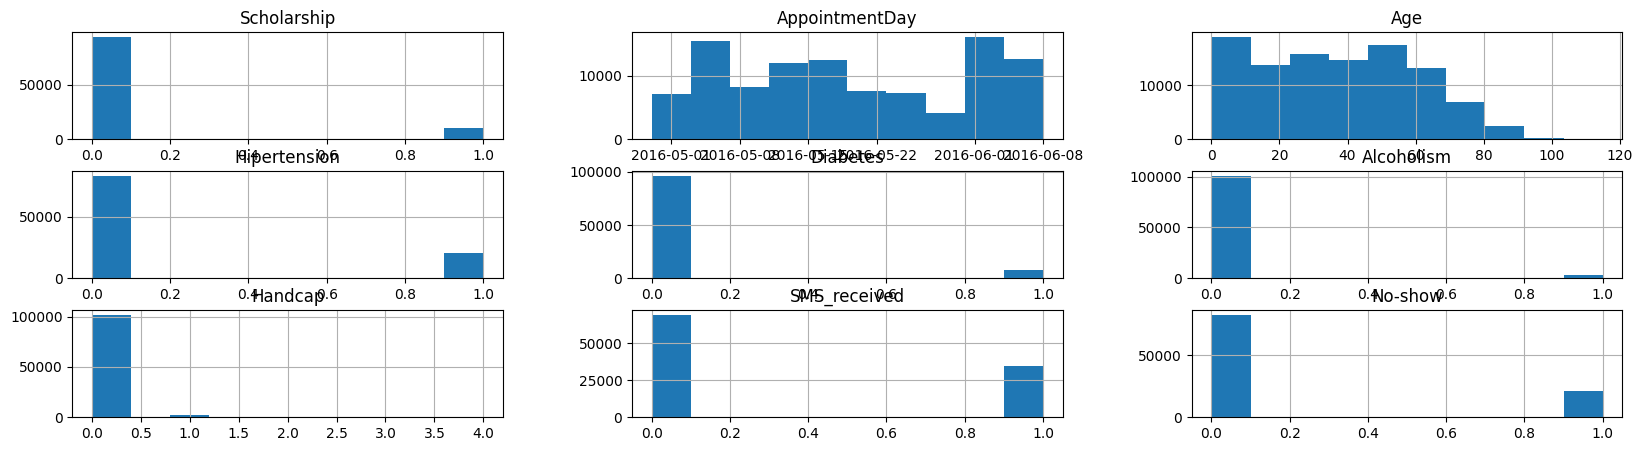

In [22]:
columns_to_plot = ['Gender','Scholarship','AppointmentDay','Age','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No-show']

clean_df[columns_to_plot].hist(figsize=(20, 5))

Some graphs show that the variables individually

### How many patiants attended the appointment?

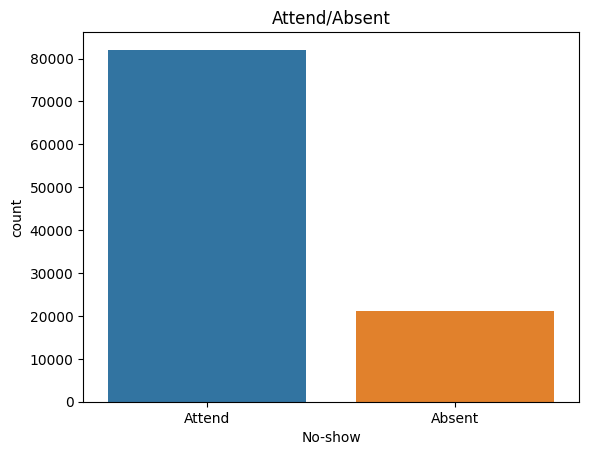

In [23]:
#lets see how many patient attend or not
ax = sns.countplot(x=clean_df['No-show'], data=clean_df)
ax.set_title('Attend/Absent')
ax.set_xticklabels(['Attend', 'Absent'])
plt.show()

About 75% of Patient Attend and 25% Absent

### How does the age affect the attendace?

Text(0, 0.5, 'Patients Number')

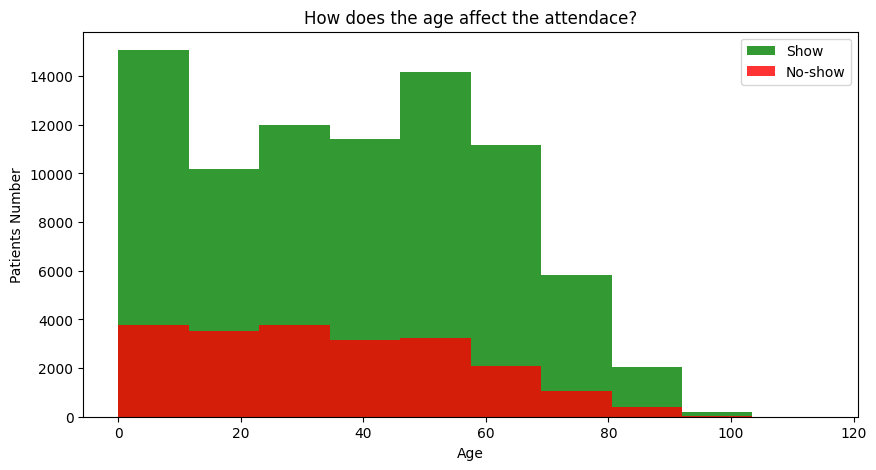

In [24]:
plt.figure(figsize=[10,5])
clean_df[clean_df['No-show'] == 0]['Age'].plot(kind='hist', alpha=0.8, color='green', label='Show')
clean_df[clean_df['No-show'] == 1]['Age'].plot(kind='hist', alpha=0.8, color='red', label='No-show')
plt.legend();

plt.title('How does the age affect the attendace?')
plt.xlabel('Age')
plt.ylabel('Patients Number')

## Some Findings:
* Attending the appointements in general is more than the absences.
* Ages between 0-10 years have the highest attendance.
* Genrally, As the age increases the attendance decreases.



### Which Neighbourhood has the highest attendance percentage?
To find out we need to count the show values and divide them by No-show values

Text(0, 0.5, 'Normalized Count')

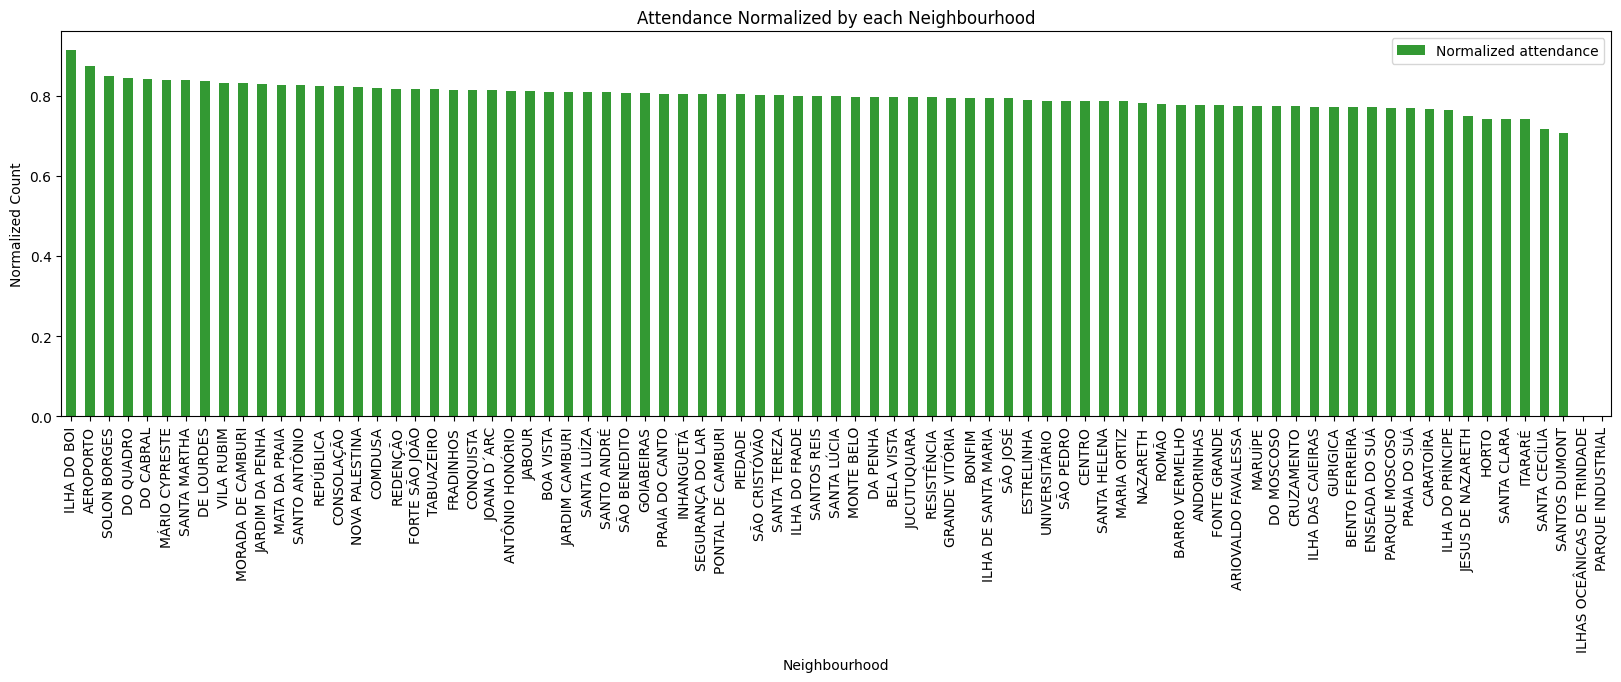

In [25]:
plt.figure(figsize=[20,5])
show_to_not_normalized = clean_df[clean_df['No-show'] == 0]['Neighbourhood'].value_counts() / (clean_df[clean_df['No-show'] == 1]['Neighbourhood'].value_counts() + clean_df[clean_df['No-show'] == 0]['Neighbourhood'].value_counts())

show_to_not_normalized.sort_values(ascending=False).plot(kind='bar', alpha=0.8, color='green', label='Normalized attendance')
plt.legend();

plt.title('Attendance Normalized by each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Normalized Count')

The graph shows that the patiants from ILHA DO BOI have the highest attendance percentage.

### Do Nighbourhood and Age affect the attendance?

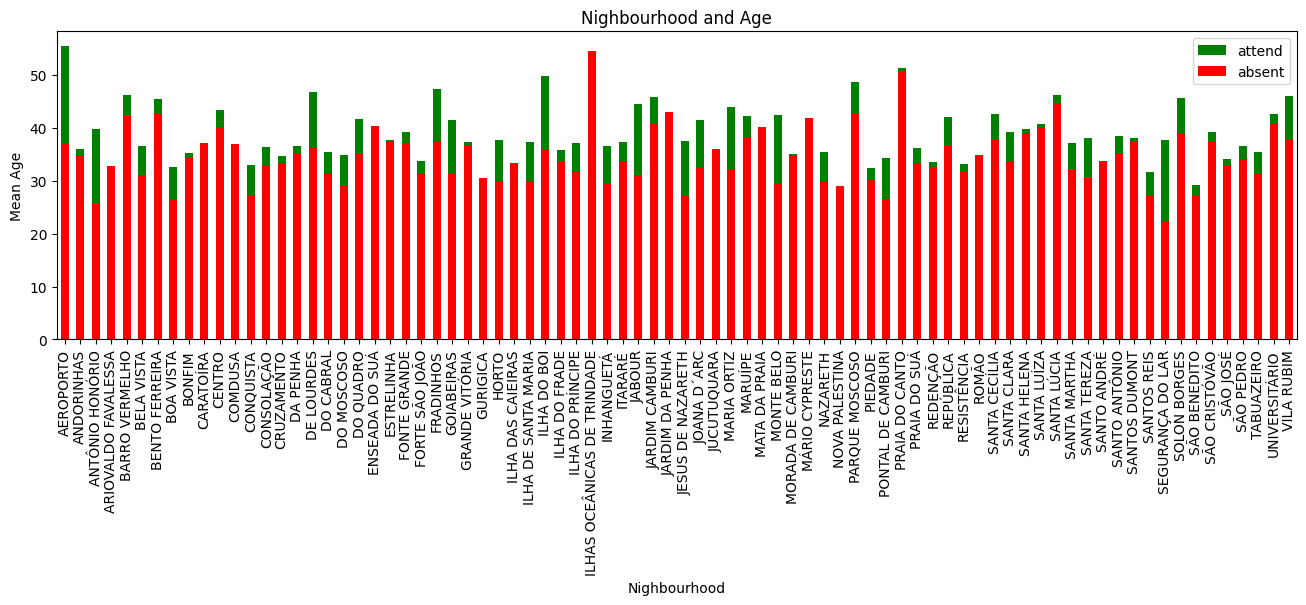

In [26]:
plt.figure(figsize=[16,4])
clean_df[clean_df['No-show'] == 0].groupby(['Neighbourhood']).Age.mean().plot(kind='bar', color='green', label='attend')
clean_df[clean_df['No-show'] == 1].groupby(['Neighbourhood']).Age.mean().plot(kind='bar', color='red', label='absent')
plt.legend();

plt.title('Nighbourhood and Age')
plt.xlabel('Nighbourhood')
plt.ylabel('Mean Age');

The graph shows that the people with age around 50 from AEROPORTO have the highest attendance.

<a id='conclusions'></a>
## Conclusions

Based on the limited exploring of the No-show appointments dataset, here's some findings and conclusion:
* First we explored and cleaned the dataset.
* The age has a clear affect on attending the appointment where pataints with age between 0-10 years have the most attendance numbers.
* Neighbourhood has affect on attending the appointment where ILHA DO BOI has the highest attendance percentage.
* Both age and neighbourhood don't show any clear conclusion. But it shows patiants from AEROPORTO with age around 50 years have the most attendance rate.

## Limitations

* Cannot find relations between independant variables because it's categorical dataset.
* The dataset is small.


In [27]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 834750 bytes to Investigate_a_Dataset.html
